#**Data Processing**

## 1. Use Google Drive link to view a folder I shared with @columbia.edu google drive users
https://drive.google.com/drive/folders/18O-BnGOIw9ZiUwy17Uk_361xyfTF-qAN?usp=sharing
## 2. Right click folder and click "Add shortcut to Drive"
This will make sure the zipfile in this folder is accessible in your personal drive folder


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
# Step 2.1
Image(url= "https://github.com/user-attachments/assets/6515aa71-484b-4364-ac44-2331477720e8", width=600, height=300)

In [ ]:
# Step 2.2
Image(url= "https://github.com/user-attachments/assets/0d0d8f6c-a868-49c4-9e38-54f3006af39b", width=600, height=300)

## 3. Reference Code for Project 2

In [ ]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"


Mounted at /content/drive


In [ ]:
# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
  inflating: COVID-19_Radiograp

In [ ]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


In [ ]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-2679.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2189.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3433.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3233.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2494.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3173.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1379.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1776.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3481.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3333.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-307.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1713.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2712.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-591.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1158.png', 'COVID-19_Radiography_Dataset/COVID/images/C

In [ ]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

In [ ]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [ ]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
len(image_filepaths)

4032

In [ ]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 192,192,3 for all images
print(X.min().round() ) #min value of every image is zero
print(X.max() ) #max value of every image is one


4032
(4032, 192, 192, 3)
-0.0
1.0


In [ ]:
len(fnames[2])

1344

In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
4027,False,False,True
4028,False,False,True
4029,False,False,True
4030,False,False,True


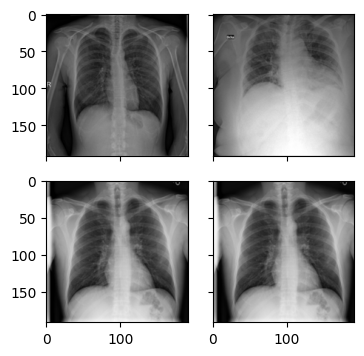

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0])
im2 =preprocessor(fnames[0][1])
im3 =preprocessor(fnames[1][1])
im4 =preprocessor(fnames[1][1])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

In [ ]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [ ]:
#Clear objects from memory
del(X)
del(y)
del(preprocessed_image_data)

In [ ]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)

with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [ ]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

# **Project 2**

### Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

# Open a file and use dump()
with open('/content/drive/MyDrive/X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

with open('/content/drive/MyDrive/X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

with open('/content/drive/MyDrive/y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)

with open('/content/drive/MyDrive/y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2741, 192, 192, 3), (2741, 3), (1291, 192, 192, 3), (1291, 3))

### 1. Visualize Images that Demonstrate When X-Rays Show COVID Positivity and When They Do Not.


In [ ]:
y_train.columns

Index(['COVID', 'NORMAL', 'PNEUMONIA'], dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def visualize_images_by_label(X, y, target_label, num_images=3):
    # Get the indices where the target_label is True
    indices = np.where(y[target_label] == True)[0]

    # Randomly select the few images based on the specified number
    selected_indices = random.sample(list(indices), num_images)

    # Create a plot to display the images
    fig, axs = plt.subplots(1, num_images, figsize=(12, 4))

    for ax, idx in zip(axs, selected_indices):
        ax.imshow(X[idx])  # Show the image
        ax.set_title(f'{target_label}')  # Show the label
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

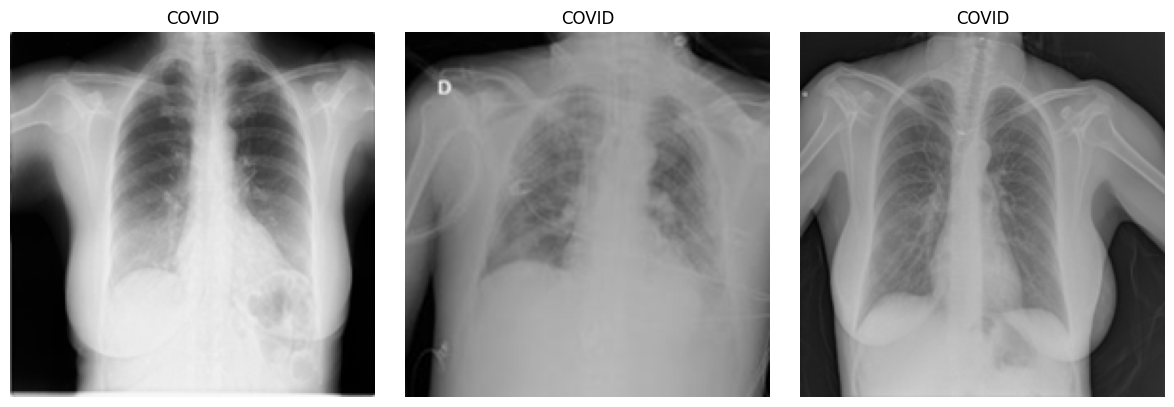

In [ ]:
target_label = 'COVID'
visualize_images_by_label(X_train, y_train, target_label)

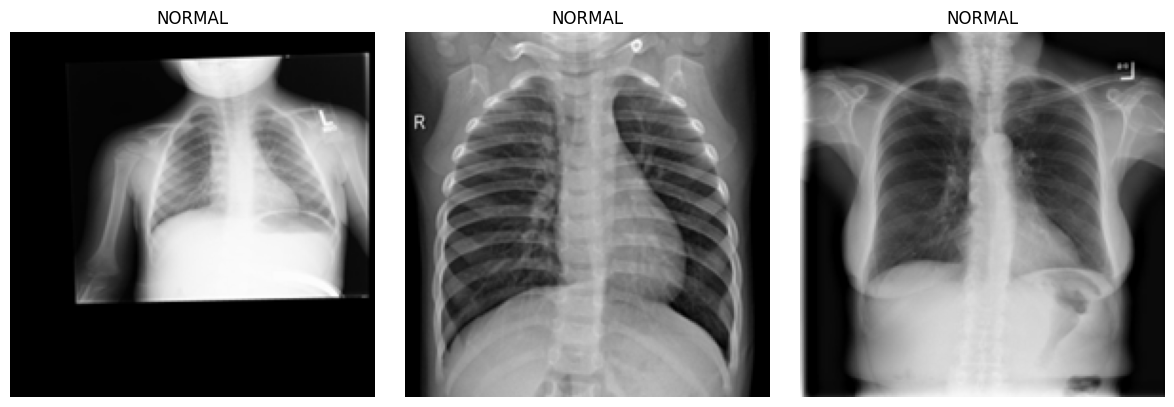

In [ ]:
target_label = 'NORMAL'
visualize_images_by_label(X_train, y_train, target_label)

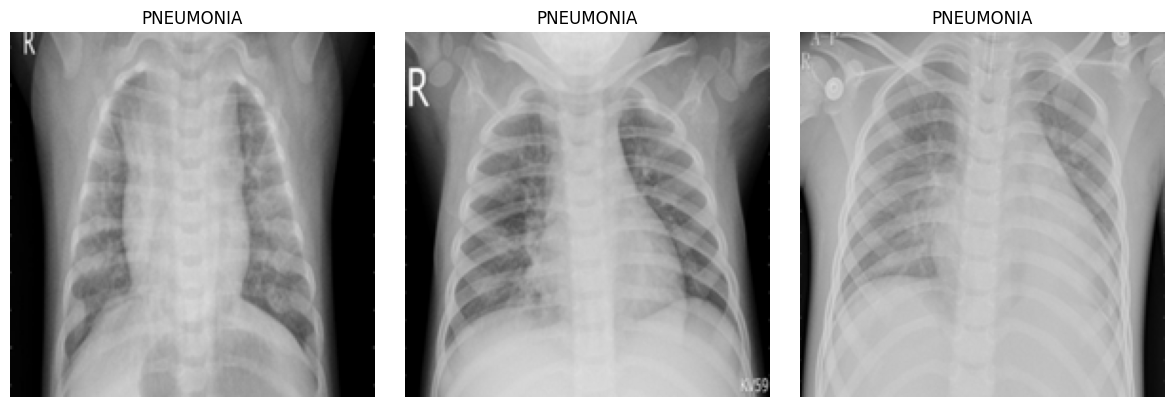

In [ ]:
target_label = 'PNEUMONIA'
visualize_images_by_label(X_train, y_train, target_label)

### 2. Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful. Who could benefit from a model like this? Explain.

The dataset consists of chest X-ray images categorized into three classes: viral pneumonia, COVID-19, and normal chest images. The number of images in each category is 1,345 for viral pneumonia, 3,616 for COVID-19, and 10,192 for normal chest images. This dataset consists of six different sub-databases. The COVID-19 data was developed by the authors from collected and publicly available sources. The normal and viral pneumonia data were sourced from publicly available Kaggle databases.

COVID-19 is a rapidly spreading pandemic. Therefore, it is necessary to implement effective screening and immediate medical responses for infected patients. During the COVID-19 outbreak, at first, the most commonly used technique for detecting the virus was Polymerase Chain Reaction (RT-PCR). However, this method has several drawbacks: it is manual, complicated, labor-intensive, time-consuming, and has a low positivity rate. Additionally, there is often a shortage of supplies and equipment, and it is expensive. Such a costly screening tool, combined with delayed test results, contributes to the spread of the disease and worsen the situation.

Typical chest X-ray (CXR) images may assist in the early screening of suspected cases. However, images of various viral pneumonias can be similar and overlap with other infectious and inflammatory lung diseases. This similarity makes it challenging for radiologists to distinguish COVID-19 from other viral pneumonias.

With the advent of more advanced image classification techniques, deep learning methods like CNN can help reveal features in images that are not apparent in the original data, aiding in making a definitive diagnosis of COVID-19 cases. Building a predictive model can help quickly and cost-effectively identify COVID-19 infections.

People in underdeveloped, developing, and developed countries will all benefit from this model because using a predictive model to classify COVID-19 cases from X-ray chest images is economical, effective, and accurate. It is also easy to implement.

### 3. Run at least three prediction models to try to predict x-ray images well.






*   Use transfer learning for at least one of these models

*   Discuss which models performed better and point out relevant hyper-parameter values for successful models.





In [ ]:

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Visualize the training history
def plot_history(history):
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training History')  # Corrected quotation marks
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()  # Optional: adds a grid for better readability
    plt.show()

### **Keras Convolutional Neural Network**



Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.5910 - loss: 20.9835 - val_accuracy: 0.3406 - val_loss: 35.2249
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7613 - loss: 0.8262 - val_accuracy: 0.3406 - val_loss: 21.7313
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8237 - loss: 0.7394 - val_accuracy: 0.4900 - val_loss: 4.4255
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8579 - loss: 0.3403 - val_accuracy: 0.7268 - val_loss: 1.9512
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8821 - loss: 0.3009 - val_accuracy: 0.7741 - val_loss: 1.0010
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9308 - loss: 0.2249 - val_accuracy: 0.7359 - val_loss: 2.8303
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9478 - loss: 0.1693 - val_accuracy: 0.8288 - val_loss: 0.6783
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9421 - loss: 0.2167 - val_accuracy: 0.874

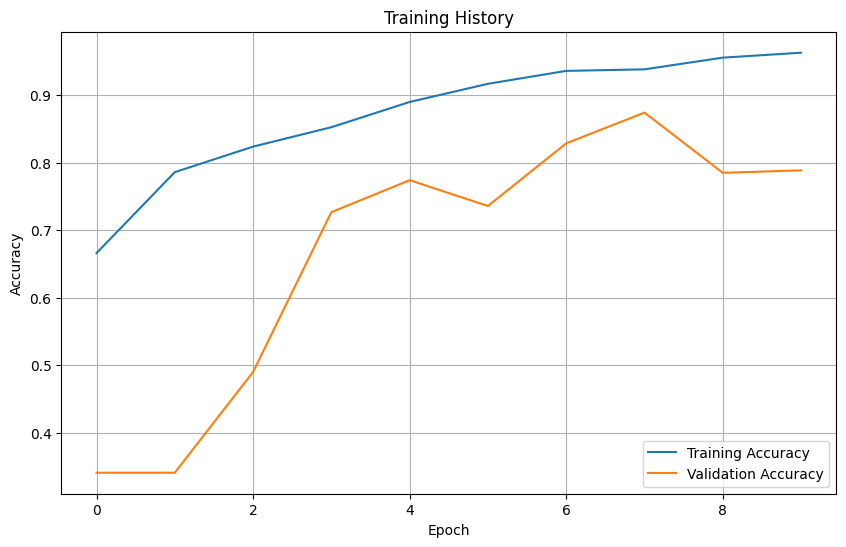

In [ ]:
model = Sequential()
model.add(Input(shape=(192, 192, 3))) # Define the input layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                  epochs=10, verbose=1,batch_size=32, validation_split=0.2)

plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


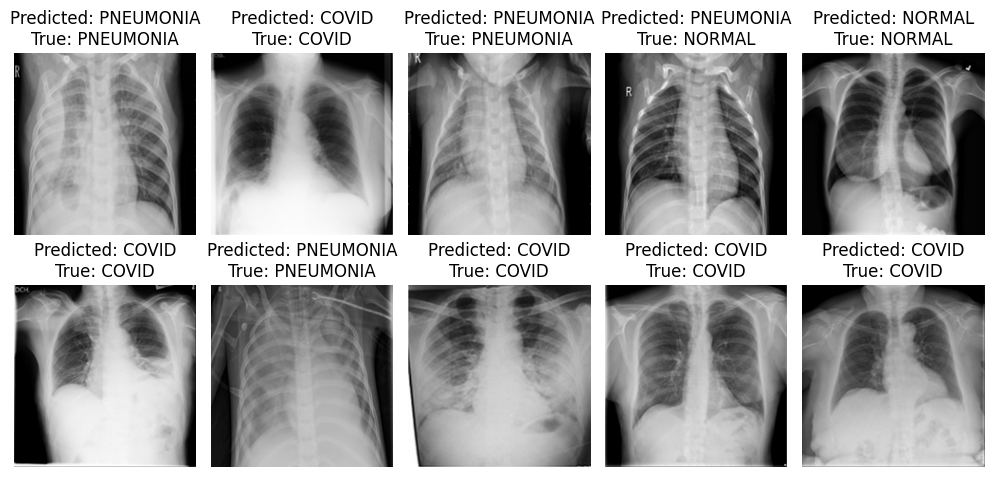

In [ ]:
# Select a random subset of images from a test dataset, uses a trained model to make predictions on them
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]

# Convert the true labels from one-hot encoded back to the flower names
true_labels = random_labels.idxmax(axis=1).values

# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

for i in range(2):  # Outer loop for the rows
    for j in range(5):  # Inner loop for the columns
        idx = 5 * i + j  # Calculate the index for the current image
        ax[i, j].imshow(random_images[idx], cmap='gray')  # Show the random images
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')
        ax[i, j].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

### **Transfer Learning with VGG19 Model**



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3060 - loss: 6.3142   
Epoch 1: val_accuracy improved from -inf to 0.34062, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.3064 - loss: 6.2191 - val_accuracy: 0.3406 - val_loss: 1.0995 - learning_rate: 0.0010
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.3578 - loss: 1.0989
Epoch 2: val_accuracy did not improve from 0.34062
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 823ms/step - accuracy: 0.3576 - loss: 1.0989 - val_accuracy: 0.3388 - val_loss: 1.0981 - learning_rate: 0.0010
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.3281 - loss: 1.0985
Epoch 3: val_accuracy improved from 0.34062 to 0.39891, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 876ms/step - accuracy: 0.3279 - loss: 1.0985 - val_accuracy: 0.3989 - val_loss: 1.0967 - learning_rate: 0.0010
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 

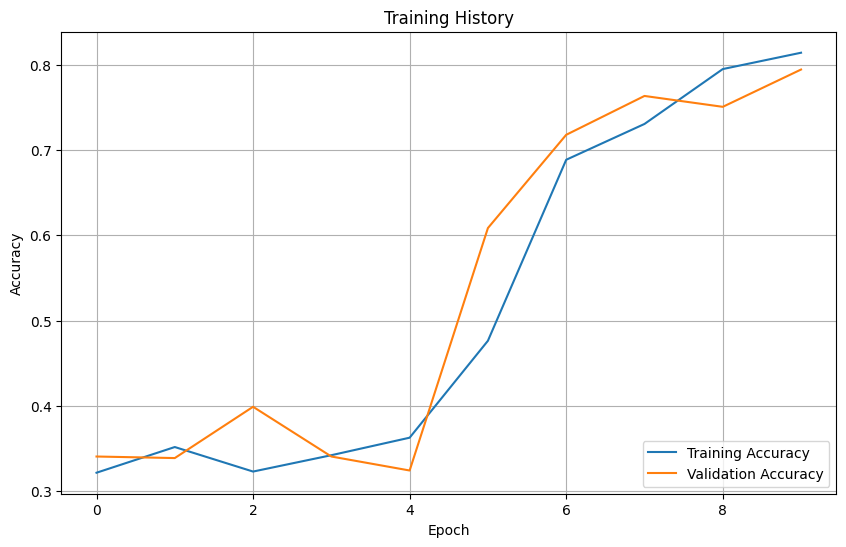

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Load the VGG19 model without the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze the base model layers
#for layer in base_model.layers:
    #layer.trainable = False

for layer in base_model.layers[-10:]:  # Unfreeze the last 5 layers
    layer.trainable = True

# Define the new model architecture
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(100, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)

# Create the model
model = Model(inputs=base_model.inputs, outputs=output)

with tf.device('/device:GPU:0'):
    # Callbacks
    mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.0005)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, batch_size=64,
              epochs=10, verbose=1, validation_split=0.2, callbacks=[mc, red_lr, early_stopping])
    plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


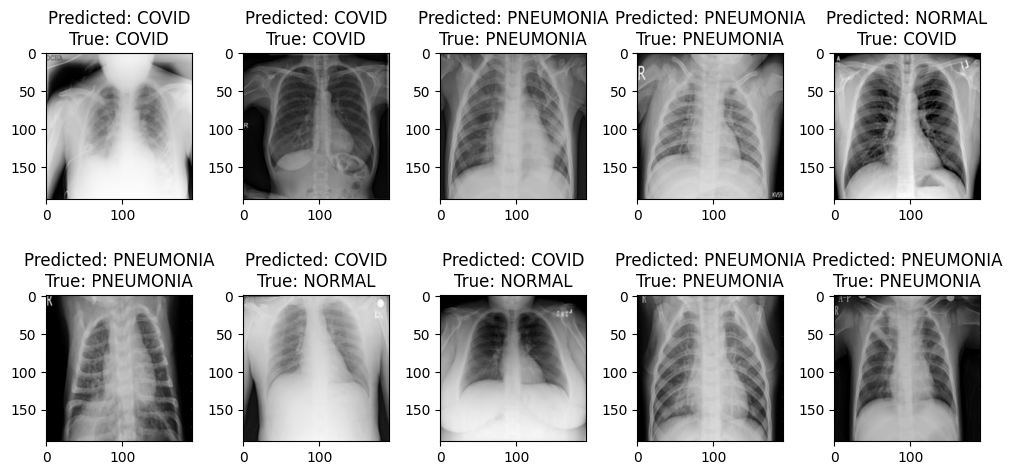

In [ ]:
# Select a random subset of images from a test dataset, uses a trained model to make predictions on them
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]  # Use iloc to index by row number
true_labels = random_labels.idxmax(axis=1).values

# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(X_test[random_indices[idx]])
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')

plt.tight_layout()

### **Transfer Learning with Inception Model**

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7862 - loss: 0.5077   
Epoch 1: val_accuracy improved from -inf to 0.33880, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.7884 - loss: 0.5029 - val_accuracy: 0.3388 - val_loss: 206.4107 - learning_rate: 0.0010
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9406 - loss: 0.1477
Epoch 2: val_accuracy improved from 0.33880 to 0.45537, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 750ms/step - accuracy: 0.9406 - loss: 0.1476 - val_accuracy: 0.4554 - val_loss: 5.7913 - learning_rate: 0.0010
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9750 - loss: 0.0729
Epoch 3: val_accuracy improved from 0.45537 to 0.59016, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 876ms/step - accuracy: 0.9747 - loss: 0.0738 - val_accuracy: 0.5902 - val_loss: 2.8216 - learning_rate: 0.0010
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step 

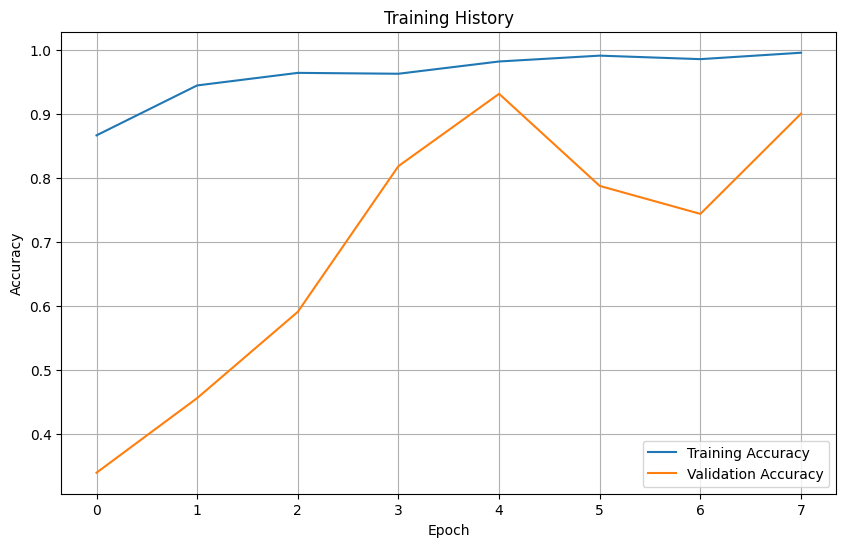

In [ ]:
from tensorflow.keras.applications import InceptionV3


base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Unfreeze the last 10 layers of the base model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add GlobalAveragePooling and Dense layers on top
gap1 = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(100, activation='relu')(gap1)
output = layers.Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
with tf.device('/device:GPU:0'):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Set up callbacks
    mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.0005)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2,
                        callbacks=[mc, red_lr, early_stopping])

    # Plot training history (assuming plot_history is defined elsewhere)
    plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


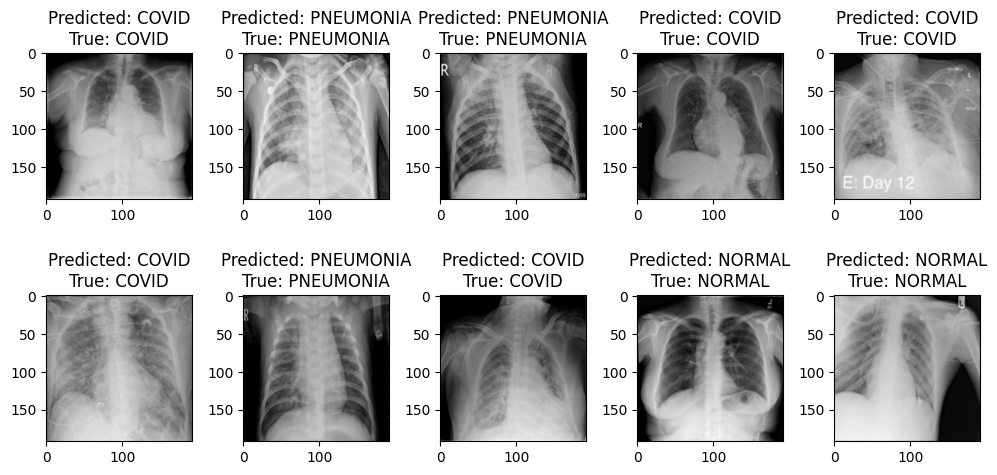

In [ ]:
# Select a random subset of images from a test dataset, uses a trained model to make predictions on them
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]  # Use iloc to index by row number
true_labels = random_labels.idxmax(axis=1).values
# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(X_test[random_indices[idx]])
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')

plt.tight_layout()

### **Transfer Learning with ResNet Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7261 - loss: 0.8830   
Epoch 1: val_accuracy improved from -inf to 0.34062, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7288 - loss: 0.8758 - val_accuracy: 0.3406 - val_loss: 503.3029 - learning_rate: 0.0010
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9152 - loss: 0.2662
Epoch 2: val_accuracy did not improve from 0.34062
35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.9156 - loss: 0.2648 - val_accuracy: 0.3388 - val_loss: 1.8429 - learning_rate: 0.0010
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9635 - loss: 0.1070
Epoch 3: val_accuracy did not improve from 0.34062

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 404ms/step - accuracy: 0.9636 - loss: 0.1069 - val_accuracy: 0.3388 - val_loss: 6.6647 - learning_rate: 0.0010


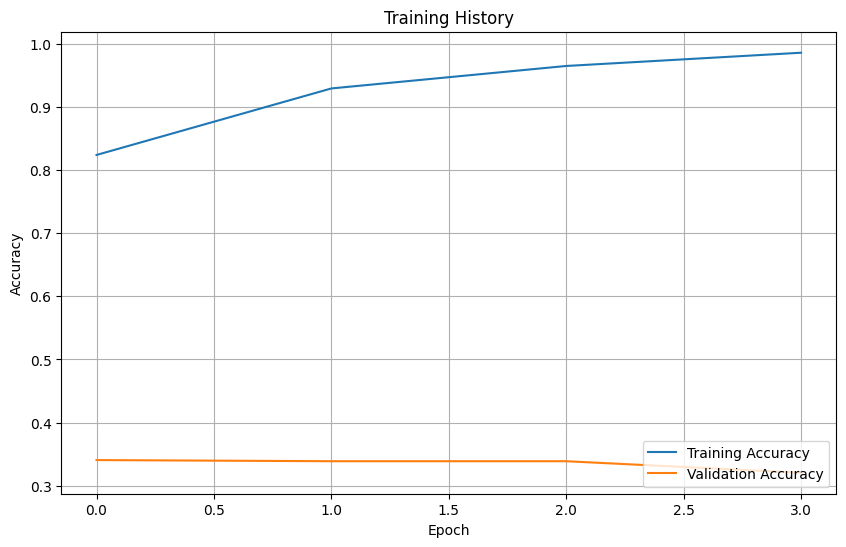

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

#for layer in base_model.layers:
    #layer.trainable = False

for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

gap1 = GlobalAveragePooling2D()(base_model.output)
output = Dense(3, activation='softmax')(gap1)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model

with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.0005)
  early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

  # Train the model
  history = model.fit(X_train, y_train, batch_size=64,
                      epochs=10, verbose=1, validation_split=0.2,
                      callbacks=[mc, red_lr, early_stopping])
  plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


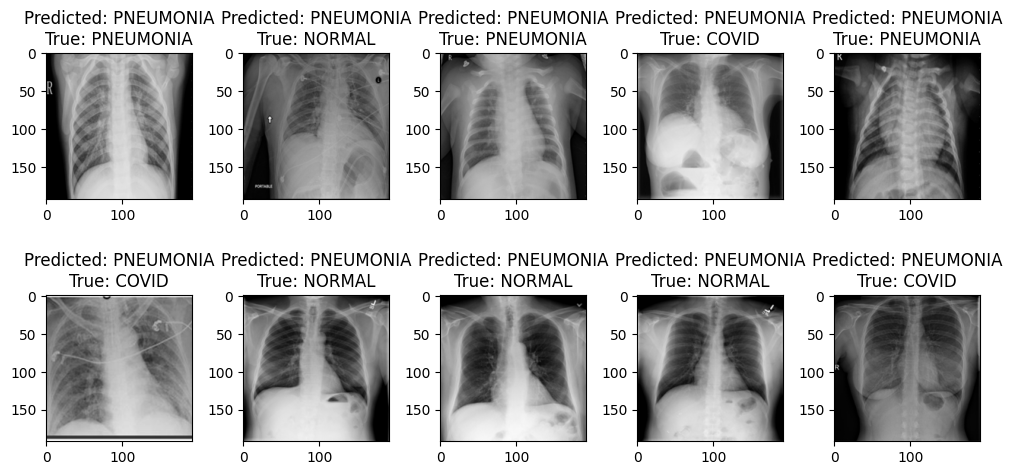

In [ ]:
# Select a random subset of images from a test dataset, uses a trained model to make predictions on them
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]  # Use iloc to index by row number
true_labels = random_labels.idxmax(axis=1).values
# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(X_test[random_indices[idx]])
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')

plt.tight_layout()

After experimenting with a standard CNN model and transfer learning models (InceptionV3, ResNet50, and VGG19), we found that the transfer learning model with InceptionV3 performed the best when trained for 5 epochs, achieving an accuracy of 0.9831 , a loss of 0.0518, validation accuracy of  0.9308 , and validation loss of 0.3232, with a learning rate of 0.0010. For all transfer learning models, we adjusted parameters such as the optimizer (SGD, Adam, RMSprop), the number of output layers to unfreeze (last 5, last 10, or none), and set different thresholds for callbacks. Additionally, we tried running the model with more epochs to observe performance improvements, but the running time became excessively long.

VGG19 shows potential to become a better model if extended to more epochs; however, due to the limited number of epochs, it does not perform as well as InceptionV3. Although ResNet50 achieves high accuracy on the training data, it shows very low validation accuracy, indicating clear overfitting. Perhaps adding extra regularization during training could help address this. The standard CNN model performs reasonably well.

The best model uses InceptionV3 with ImageNet weights and fine-tunes the last 10 layers. It adds a GlobalAveragePooling layer, followed by two dense layers: one with 100 units and ReLU activation, and another with 3 units and softmax for classification. The Adam optimizer, categorical crossentropy loss, and accuracy metric are used. Key callbacks include 'ModelCheckpoint' for saving the best model, 'ReduceLROnPlateau' to adjust the learning rate, and 'EarlyStopping' to halt training if there's no improvement. The model trains for 10 epochs with a batch size of 64 and 20% validation split.

###4. Try to use augmented data to rerun at least one model and then discuss the results you observe.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,          # Random rotation up to 40 degrees
    width_shift_range=0.2,      # Random width shift
    height_shift_range=0.2,     # Random height shift
    zoom_range=0.2,             # Random zoom
    horizontal_flip=True,# Random horizontal flip
     validation_split=0.2

    )


datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=64, subset='training')
val_generator = datagen.flow(X_train, y_train, batch_size=64, subset='validation')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7201 - loss: 0.8081
Epoch 1: val_accuracy improved from -inf to 0.32117, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.7223 - loss: 0.8019 - val_accuracy: 0.3212 - val_loss: 51.5722 - learning_rate: 0.0010
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.8724 - loss: 0.3134
Epoch 2: val_accuracy did not improve from 0.32117
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 740ms/step - accuracy: 0.8727 - loss: 0.3133 - val_accuracy: 0.3212 - val_loss: 14.7373 - learning_rate: 0.0010
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.9085 - loss: 0.2815
Epoch 3: val_accuracy improved from 0.32117 to 0.35036, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9082 - loss: 0.2815 - val_accuracy: 0.3504 - val_loss: 1.2574 - learning_rate: 0.0010
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.8943 - loss: 0.2794
Epoch 4: val_accuracy

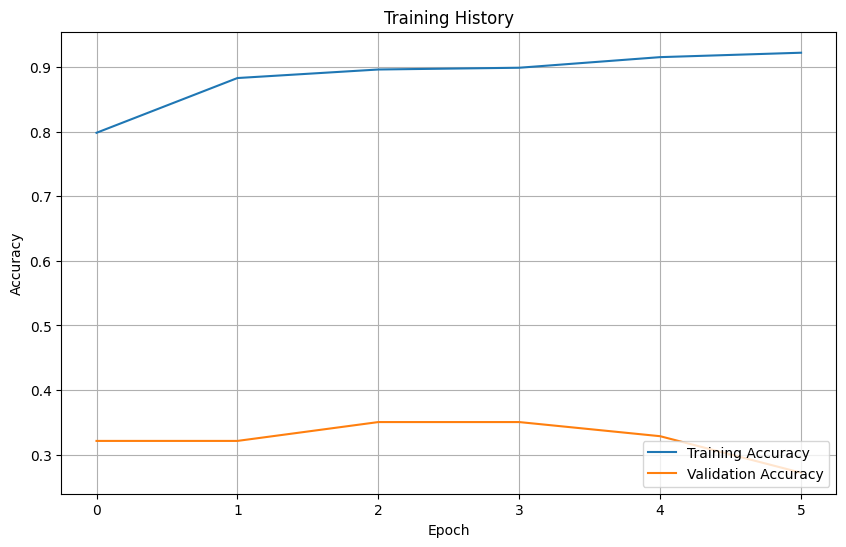

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

#for layer in base_model.layers:
    #layer.trainable = False

for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

gap1 = GlobalAveragePooling2D()(base_model.output)
output = Dense(3, activation='softmax')(gap1)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model

with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.0005)
  early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

  history = model.fit(train_generator,
                      epochs=10,
                      validation_data=val_generator,
                      callbacks=[mc, red_lr, early_stopping])
  plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


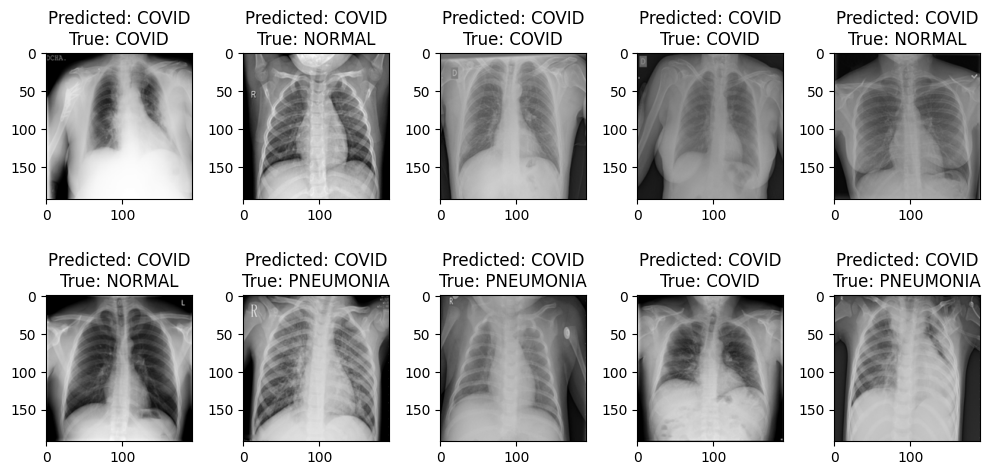

In [ ]:
num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
random_images = X_test[random_indices]
random_labels = y_test.iloc[random_indices]  # Use iloc to index by row number

true_labels = random_labels.idxmax(axis=1).values

# Make predictions on the randomly selected images
predictions = model.predict(random_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [y_train.columns[i] for i in predicted_classes]

# Plot the images with their predicted and actual labels
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        ax[i, j].imshow(X_test[random_indices[idx]])
        ax[i, j].set_title(f'Predicted: {predicted_labels[idx]}\nTrue: {true_labels[idx]}')

plt.tight_layout()

Typically, data augmentation introduces diversity in the training data through various transformations, helping the model generalize better to unseen data. However, based on the results of the augmented ResNet model, there isn’t significant improvement. Although the augmented model shows reduced overfitting, it continues to struggle with validation accuracy. The lower training accuracy in the augmented model indicates that data augmentation adds useful complexity, making the training data more challenging and potentially helping prevent overfitting. However, with validation accuracy still at 27.19% in Epoch 6, the model faces challenges in generalization despite the applied augmentations. This may suggest that we need to fine-tune the augmentation strategies further.

###5. Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.

We have experimented with several models, including a standard CNN, transfer learning with InceptionV3, ResNet50, VGG19, and an augmented ResNet50 model. Among these, the standard CNN and InceptionV3 demonstrated the better performance within the limited epochs and parameter fine-tuning attempted. The best model of InceptionV3 outperforms the best model of the standard CNN in validation accuracy and shows better generalization.

The standard CNN model has an input shape of 192x192x3, with three Conv2D layers using 32, 64, and 128 filters and 3x3 kernels, each followed by batch normalization and max pooling. It includes a fully connected layer with 100 units, and a softmax output layer for three classes. The model is trained with 'categorical_crossentropy' loss and the 'RMSprop' optimizer for 10 epochs, using a batch size of 32 and a 20% validation split.

The InceptionV3 model is fine-tuned by unfreezing its last 10 layers, with global average pooling, a 100-unit dense layer, and a softmax output layer added for 3-class classification. It's compiled with the 'Adam' optimizer and 'categorical_crossentropy' loss, using callbacks for checkpointing, learning rate adjustment, and early stopping. Training is set for 10 epochs with a batch size of 64 and a 20% validation split.

